In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [58]:
T = 100.
dt = 0.002
N = int(T/dt)+1
t = numpy.linspace(0.,T,N)

In [59]:
zt = 100.
g = 9.81

z0 = zt
b0 = 10.

u = numpy.array([z0,b0])

z = numpy.zeros(N)
z[0] = z0

In [60]:
for n in range(1,N):
    u = u + dt*numpy.array([ u[1] , g*(1-u[0]/zt) ])
    z[n]=u[0]

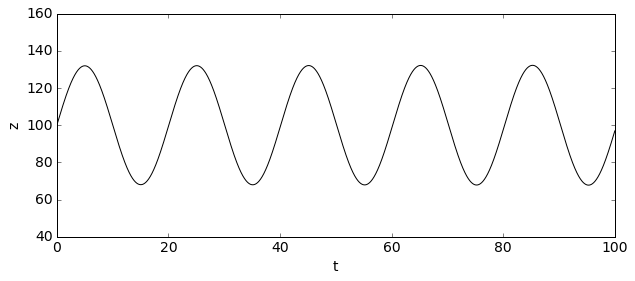

In [61]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('z',fontsize=14)
pyplot.plot(t,z,'k-')

In [62]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

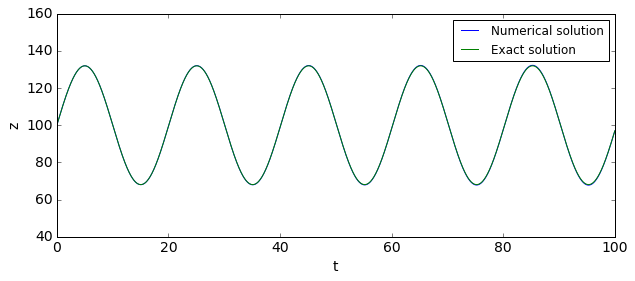

In [63]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)
pyplot.tick_params(axis='both',labelsize=14)
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('z',fontsize=14)
pyplot.plot(t,z,label='Numerical solution')
pyplot.plot(t,z_exact,label = 'Exact solution' )
pyplot.legend();

In [65]:
dt_values = numpy.array([0.1,0.05,0.01,0.005,0.001,0.0001])

z_values = numpy.empty_like(dt_values,dtype=numpy.ndarray)

for i,dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.,T,N)
    
    u = numpy.array([z0,b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        u = u +dt*numpy.array([ u[1], g*(1-u[0]/zt) ])
        z[n] = u[0]
        
    z_values[i] = z.copy()

In [66]:
def get_error(z,dt):
    N = len(z)
    t = numpy.linspace(0,T,N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [67]:
error_values = numpy.empty_like(dt_values)

for i,dt in enumerate(dt_values):
    error_values[i]=get_error(z_values[i],dt)

In [68]:
error_values

array([  5.95367338e+02,   2.72677398e+02,   5.09668696e+01,
         2.52726943e+01,   5.02119422e+00,   5.01373708e-01])

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

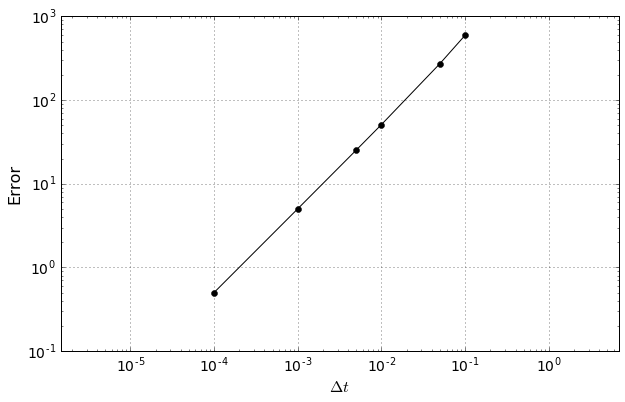

In [71]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both',labelsize = 14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$',fontsize = 16)
pyplot.ylabel('Error',fontsize =16)
pyplot.loglog(dt_values,error_values,'ko-')
pyplot.axis('equal')